In [1]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /Users/girl_intransition/netflix.csv
100%|██████████████████████████████████████| 3.40M/3.40M [00:00<00:00, 10.3MB/s]


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd 
nflix = pd.read_csv("/Users/girl_intransition/netflix.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = nflix

How to grow the business, what kind of shows to produce, which genres / nationality movies are trending,

> Assumptions made: 
> 1. Whatever data is given for each movie/TV show is correct.
> 2. The data given is a reflection of the fact that this kind of content worked in favor of the company

Because we do not have any quantifiable measures like revenue of the movie/tv show, user rating or critic rating and views etc, we are going to take fields like genres, director, actors and analyse what is contributing to the current success and make recommendations accordingly. 

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### >> Basic observations about the data 

In [6]:
df.shape

(8807, 12)

> We have 8807 shows/movies in out netflix database as on 

In [8]:
nflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
nflix.shape

(8807, 12)

In [10]:
# no of rows with 0,1,2 and 3 null values  

nflix.isna().sum(axis=1).value_counts()



0    5332
1    2741
2     636
3      98
dtype: int64

In [11]:
nflix.loc[nflix.isna().sum(axis=1) == 3]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
74,s75,TV Show,The World's Most Amazing Vacation Rentals,NaN,NaN,NaN,"September 14, 2021",2021,TV-PG,2 Seasons,Reality TV,"With an eye for every budget, three travelers ..."
123,s124,TV Show,Luv Kushh,NaN,NaN,NaN,"September 2, 2021",2012,TV-Y7,1 Season,Kids' TV,"Based on the last book of the epic Ramayana, t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7812,s7813,TV Show,Queens of Comedy,NaN,NaN,NaN,"May 1, 2018",2017,TV-MA,1 Season,"International TV Shows, Stand-Up Comedy & Talk...",Eight women perform in front of celebrity judg...
8109,s8110,TV Show,Strongland,NaN,NaN,NaN,"January 18, 2019",2018,TV-PG,1 Season,"Docuseries, International TV Shows",From Spain's countryside to Scotland's stony t...
8199,s8200,TV Show,The Bachelor,NaN,NaN,NaN,"December 1, 2019",2009,TV-14,1 Season,"Reality TV, Romantic TV Shows",A single man searches for his soulmate through...
8609,s8610,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,"International TV Shows, Reality TV",Australia's toughest tow truck operators work ...


### Notes: 

1. We are not deleting rows with three null values because we could use the data present in other fields like genre/listed_in, release year and duration to do analysis 

2. They could be deleted if required when specifically working with director, cast and country variables

In [12]:
# no of null values in each column
nflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
nflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [14]:
nflix.director.value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [15]:
nflix['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [16]:
nflix['cast'].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [17]:
nflix['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

## preprocessing of data - (unnesting fields like actor, director and country)

1. We have a lot of nested data in 4 columns, so we'll unnest/split the values in to more rows while all the other data remains same.
2. Strip all the processed columns of any white spaces.
3. We will convert the dtype of release_year to float (because we have null values),date_added to datetime format and extract numeric values from the duration column and convert to float value(we have null values). 


In [18]:
nflix['cast'] = nflix['cast'].str.split(',') 
nflix = nflix.explode(['cast'],ignore_index=True)
nflix['cast']

0                           NaN
1                    Ama Qamata
2                   Khosi Ngema
3                 Gail Mabalane
4                Thabang Molaba
                  ...          
64946          Manish Chaudhary
64947              Meghna Malik
64948             Malkeet Rauni
64949            Anita Shabdish
64950     Chittaranjan Tripathy
Name: cast, Length: 64951, dtype: object

In [19]:
nflix['director'] = nflix['director'].str.split(',') 
nflix = nflix.explode(['director'],ignore_index=True)
nflix['director']

0        Kirsten Johnson
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
70807        Mozez Singh
70808        Mozez Singh
70809        Mozez Singh
70810        Mozez Singh
70811        Mozez Singh
Name: director, Length: 70812, dtype: object

In [20]:
nflix['country'] = nflix['country'].str.split(',') 
nflix = nflix.explode(['country'],ignore_index=True)
nflix['country']

0        United States
1         South Africa
2         South Africa
3         South Africa
4         South Africa
             ...      
89410            India
89411            India
89412            India
89413            India
89414            India
Name: country, Length: 89415, dtype: object

In [21]:
nflix['country'].str.strip()

0        United States
1         South Africa
2         South Africa
3         South Africa
4         South Africa
             ...      
89410            India
89411            India
89412            India
89413            India
89414            India
Name: country, Length: 89415, dtype: object

In [22]:
nflix['listed_in'] = nflix['listed_in'].str.split(',') 
nflix = nflix.explode(['listed_in'],ignore_index=True)
nflix['listed_in']

0                  Documentaries
1         International TV Shows
2                      TV Dramas
3                   TV Mysteries
4         International TV Shows
                   ...          
202060      International Movies
202061          Music & Musicals
202062                    Dramas
202063      International Movies
202064          Music & Musicals
Name: listed_in, Length: 202065, dtype: object

In [31]:
nflix['listed_in'] = nflix['listed_in'].str.strip()
nflix['director'] = nflix['director'].str.strip()
nflix['cast'] = nflix['cast'].str.strip()
nflix['country'] = nflix['country'].str.strip()

In [ ]:
# --> converting the duration to numeric dtype

In [35]:
nflix['duration'] = nflix['duration'].str.extract('(\d+)')
nflix['duration'] = pd.to_numeric(nflix['duration'])

In [ ]:
# --> converting date and year in to respective dtype

In [40]:
nflix['date_added'] = pd.to_datetime(nflix['date_added'],errors='coerce')


In [42]:
nflix['release_year'] = pd.to_numeric(nflix['release_year'])

In [44]:
nflix.head()   ## reflection of changes made to the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [45]:
nflix.info()    ## reflection of changes made to the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      151422 non-null  object        
 4   cast          199916 non-null  object        
 5   country       190168 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  float64       
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 18.5+ MB


In [49]:
print(nflix['release_year'].min())
print(nflix['release_year'].max())

1925
2021


In [51]:
print(nflix['date_added'].min())
print(nflix['date_added'].max())

2008-01-01 00:00:00
2021-09-25 00:00:00


In [ ]:
nflix['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
nflix['Directors'].replace(['nan'],['Unknown Director'],inplace=True)
nflix['country'].replace(['nan'],[np.nan],inplace=True)
nflix.head()
     

#### Note: 
1. After splitting nested values we have 202065 rows 
2. Our data ranges from Jan 2008 to Sept 2021 (we dont have the complete data for the year 2021)

# univariate analysis

### >> year wise distribution of content

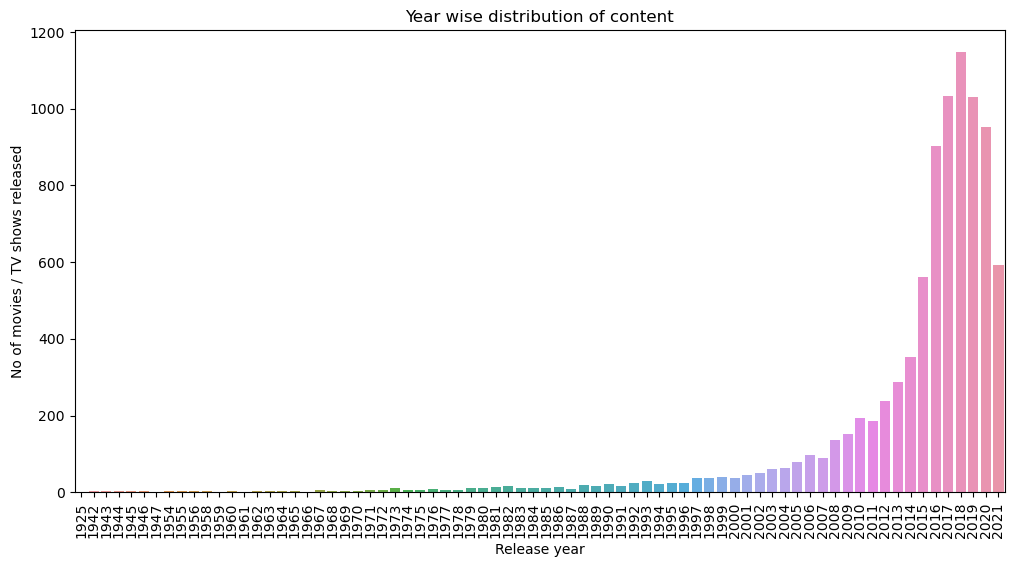

In [33]:

# How has the number of movies released per year changed over the last 20-30 years?

year_df = nflix.groupby(['release_year'])['title'].nunique().reset_index()

fig=plt.figure(figsize=(12,6))
sns.barplot(data=year_df,x='release_year',y='title')
plt.xlabel('Release year')
plt.ylabel('No of movies / TV shows released')
plt.xticks(rotation=90)
plt.title("Year wise distribution of content")
plt.show()


### Insights:

1. We can observe that the movies/tv shows released steadily increased initially and then exponentially from 2015.
2. Quantity of movies released decreased comparitively after 2018.


### >> distribution of duration 

In [52]:
#  (should be done for tv and movies saperately)

movie_df = nflix.loc[nflix['type'] == 'Movie']
tv_df = nflix.loc[nflix['type'] == 'TV Show']

In [53]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
160,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
162,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Kimiko Glenn,NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [54]:
movie_df.shape

(145917, 12)

In [55]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145917 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       145917 non-null  object        
 1   type          145917 non-null  object        
 2   title         145917 non-null  object        
 3   director      144632 non-null  object        
 4   cast          144586 non-null  object        
 5   country       139718 non-null  object        
 6   date_added    145917 non-null  datetime64[ns]
 7   release_year  145917 non-null  int64         
 8   rating        145908 non-null  object        
 9   duration      145914 non-null  float64       
 10  listed_in     145917 non-null  object        
 11  description   145917 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 14.5+ MB


In [56]:
median = movie_df['duration'].median()
nof_movies = movie_df['duration'].loc[movie_df['duration'] == median].count()

In [57]:
nof_movies

2822

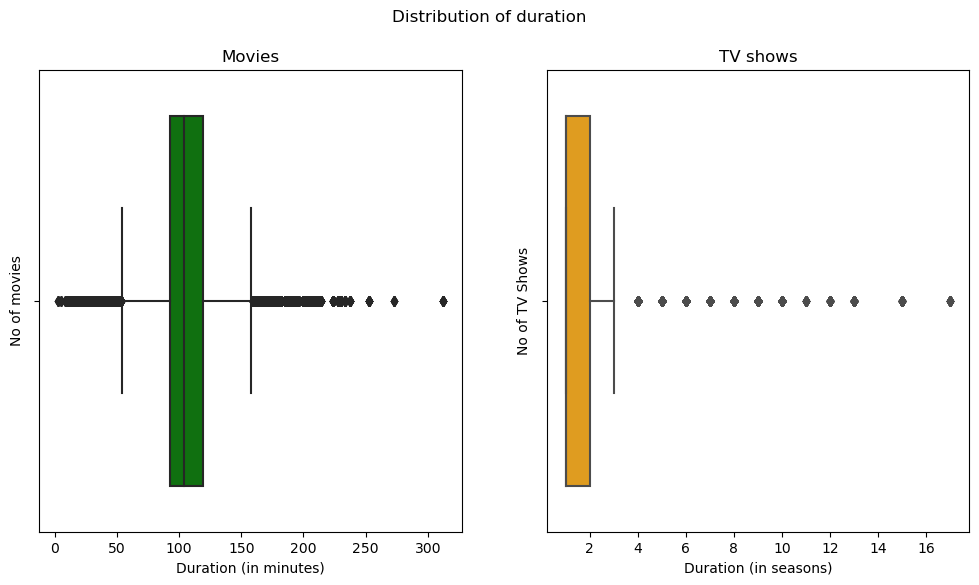

In [58]:

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(data=movie_df,x='duration',color='green')
plt.xlabel('Duration (in minutes)')
plt.ylabel('No of movies')
plt.title("Movies")

plt.subplot(1,2,2)
sns.boxplot(data=tv_df,x='duration',color='orange')
plt.xlabel('Duration (in seasons)')
plt.ylabel('No of TV Shows')
plt.title("TV shows")
plt.suptitle("Distribution of duration")
plt.show()



### Insights: 

1. The median duration for movies is a little more than 100 minutes while the minimum and maximum is at 50 mins and  160 mins respectively.
2. The median duration for TV shows is 1 season. 
3. There are a lot of outliers for the movies depending on what kind of content it is(example: documentaries). 

### >> content distribution pie chart (movie vs tv show)

In [59]:
type_count = nflix.groupby(['type'])['title'].nunique()
labels = ['Movies',"TV Shows"]
total_ = type_count.loc['Movie']+type_count.loc['TV Show']

In [60]:
m_percent = ((type_count.loc['Movie']/total_)*100).round(2)
tv_percent = ((type_count.loc['TV Show']/total_)*100).round(2)


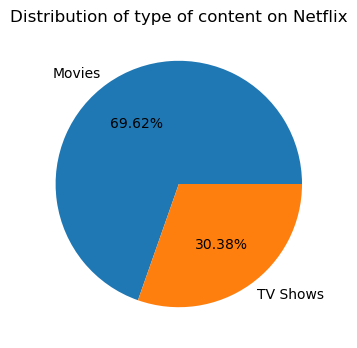

In [61]:
plt.figure(figsize=(8,4))
plt.pie([m_percent,tv_percent],labels=labels,autopct='%1.2f%%')
plt.title('Distribution of type of content on Netflix')
plt.show()

### Insights:
1. Movies make up approximately 70% of content on Netflix where as TV shows make up 30% of the content.

###   >> country wise distribution of data 

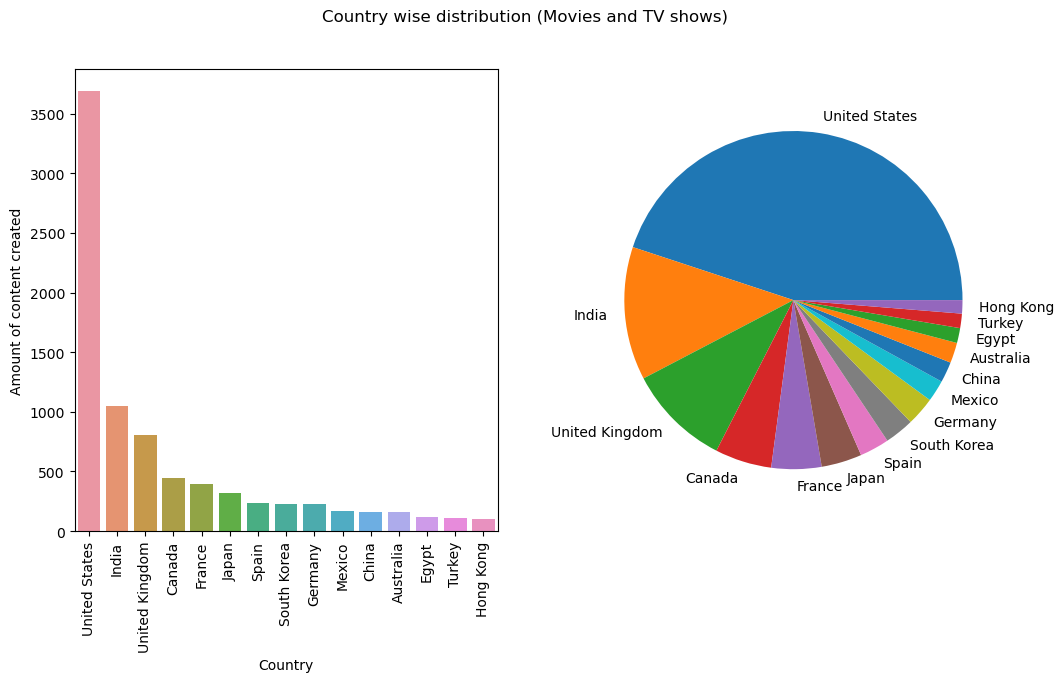

In [71]:
# - x axis(country list), y axis(title count)

country_dist = nflix.groupby(['country'])['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(15)

fig=plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(data=country_dist,x='country',y='title')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Amount of content created')


plt.subplot(1,2,2)
plt.pie(country_dist['title'],labels=country_dist['country'])

plt.suptitle('Country wise distribution (Movies and TV shows)')
plt.show()



### Insights: 
1. The content that belongs to USA's artists is a little less than 50% (45% approximately).
2. After the US, India, UK, France and Canada contributes the most data to the Netflix platform. 

Note: this data includes both movies and TV shows for each country 

### >> distribution of movies created across genres

In [75]:
 
genre = movie_df.groupby(['listed_in'])['show_id'].nunique().reset_index().sort_values(by='show_id')
 
genre_tv = tv_df.groupby(['listed_in'])['show_id'].nunique().reset_index().sort_values(by='show_id')

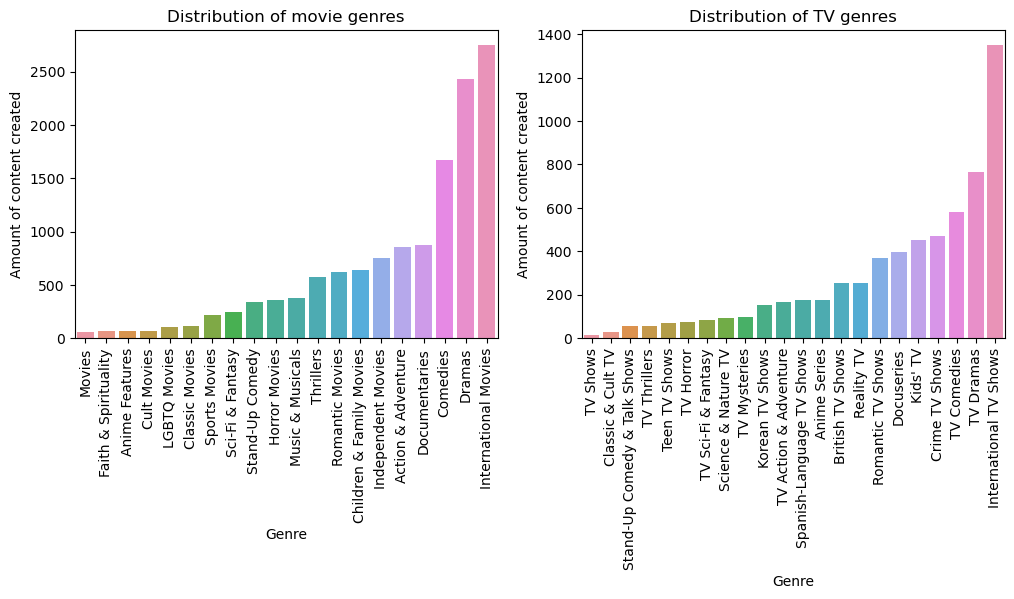

In [78]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(data=genre,x='listed_in',y='show_id')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Amount of content created')
plt.title('Distribution of movie genres')

plt.subplot(1,2,2)
sns.barplot(data=genre_tv,x='listed_in',y='show_id')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Amount of content created')
plt.title('Distribution of TV genres')

plt.show()

### Insights:
1. Dramas and comedy as the genre thats trending in both movie type and TV show type of content.
2. International show/movie is any movie that is made outside of the USA and in the local language, so we cannot consider this genre to identify the kind of content that audience like to watch. 
3. Documentaries is one genre that is fairly popular in both types. 
4. Crime TV and kids TV shows seem to be at neck with each other in the amount of content being added (or trending for this business case).
5. Action and adventure movies are also mildly popular.

### >> distribution of Rating 

In [79]:
# (across all content - movies/TV shows)

rating = nflix.groupby(['rating'])['title'].nunique().reset_index().sort_values(by='title')

In [80]:
temp = rating.loc[rating['rating'].isin(['74 min','84 min','66 min'])].index
rating.drop(temp,inplace=True)

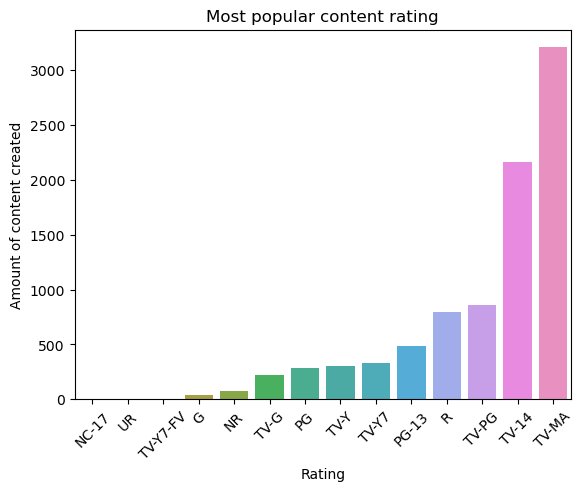

In [81]:
sns.barplot(data=rating,x='rating',y='title')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Amount of content created')
plt.title("Most popular content rating")
plt.show()

### Insights: 

1. TV-MA and TV-14 are the rating categories that are most popular with the content in Netflix.TV-MA refers to mature and adult content that may not be suitable for ages under 17 and TV-14 refers to shows that are unsuitable for ages under 14.
2. TV-PG and R are the next two rating categories that are popular. R represents Restricted and TV-PG represents recommended parental guidence.

## Bivariate analysis

### >> What type of content is available in different countries

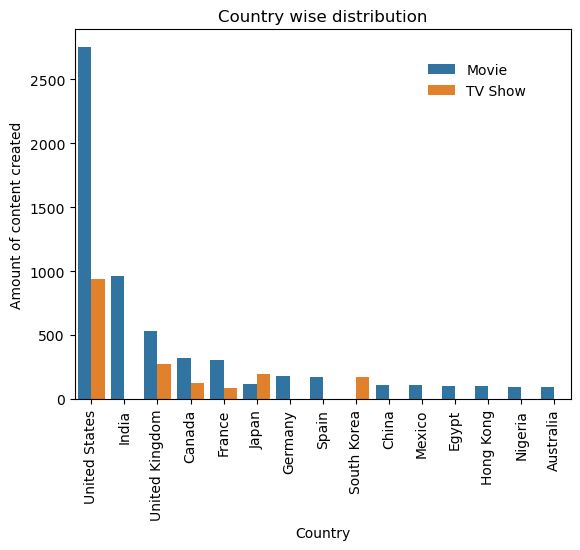

In [82]:
# how many movies and TV shows each country has released
# or


country_hue = nflix.groupby(['country','type'])['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(20)

sns.barplot(data=country_hue,x='country',y='title',hue='type')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Amount of content created')
plt.legend(loc=(0.7,0.8),frameon=False)
plt.title('Country wise distribution')
plt.show()


### Insights: 
1. Movie content created in most countries is significantly more than TV content. Japan and South Korea are the exceptions to this observation. 
2. TV show content from the countries from Germany to Australia have minimal to none (with the exception of South Korea).
3. India doesnt have any TV shows on Netflix.

### Inferences:

1. It is possible that Indian webseries or TV shows not being on Netflix might be the reason for no TV series content from India. 
2. South Korea and Japan is popular for TV series. 


### >> Trend of TV and movie genres 

In [83]:
# pick top 5 genres
# genre vs release year () - line plot with count of titles on y axis and year on x axis and genre as hue

top5_movie_genre_list = movie_df['listed_in'].value_counts().reset_index()['index'].head()
top5_movie_genre_df = movie_df.loc[movie_df['listed_in'].isin(top5_movie_genre_list)]

genre_trnd = top5_movie_genre_df.groupby(['release_year','listed_in'])['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(20)




In [84]:
genre_trnd.head()

,release_year,listed_in,title
267,2018,International Movies,340
262,2017,International Movies,328
257,2016,International Movies,305
265,2018,Dramas,304
260,2017,Dramas,285


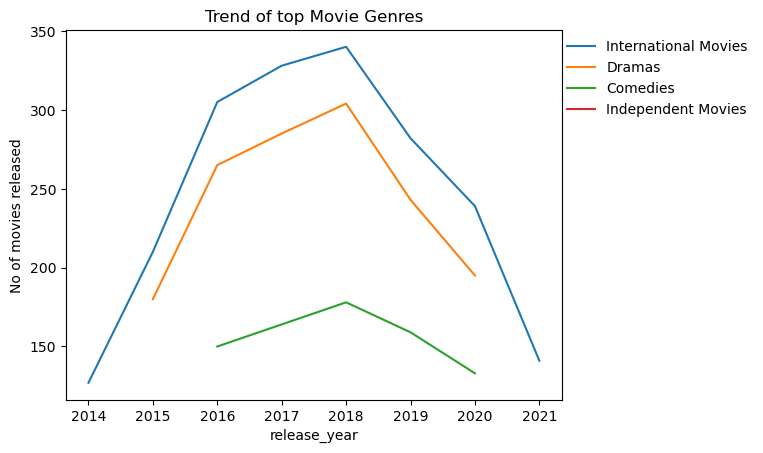

In [85]:
sns.lineplot(data = genre_trnd,x='release_year',y='title',hue='listed_in',ci=None)
plt.legend(loc=(1,0.75),frameon=False,ncol=1)
plt.ylabel('No of movies released')
plt.title('Trend of top Movie Genres')
plt.show()

In [86]:
top5_tv_genre_list = tv_df['listed_in'].value_counts().reset_index()['index'].head()
top5_tv_genre_df = tv_df.loc[tv_df['listed_in'].isin(top5_tv_genre_list)]

tv_genre_trnd = top5_tv_genre_df.groupby(['release_year','listed_in'])['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(20)



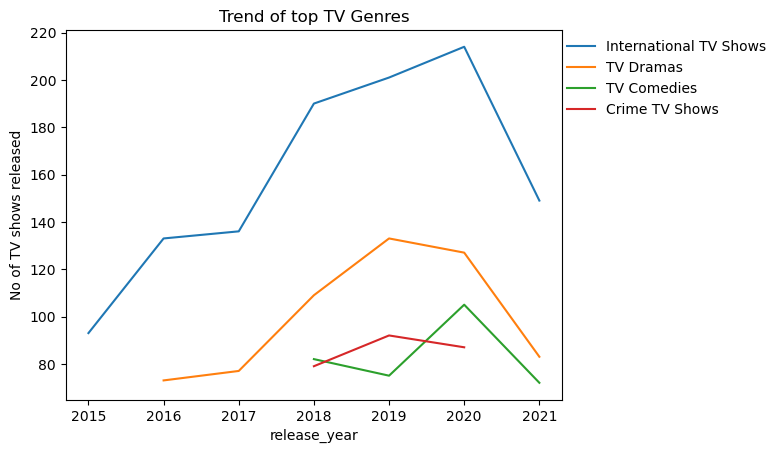

In [87]:
sns.lineplot(data = tv_genre_trnd,x='release_year',y='title',hue='listed_in',ci=None)
plt.legend(loc=(1,0.75),frameon=False,ncol=1)
plt.ylabel('No of TV shows released')
plt.title('Trend of top TV Genres')
plt.show()

### Insights: 

#### TV 
1. Trend of the genre Dramas in both movie and TV categories have always been popular. 
2. Meanwhile comedy genre has seen slow decline from 2018 to 2019 but steadily picked up after 2019. 
3. Crime genre saw and overall increase in demand.
4. All the content being released saw a dip after the year 2020. 

#### Movies
1. Dramas and comedy is the top genre. 
2. Movie releases for these genres have decreased after 2018. 

### >> Distribution of duration with respect to genre

In [ ]:
# duration vs genre - duration on x axis and count of titles on y axis, hue=genre 

In [90]:
top5_tv_genre_list = tv_df['listed_in'].value_counts().reset_index()['index'].head()
top5_tv_genre_df = tv_df.loc[tv_df['listed_in'].isin(top5_tv_genre_list)]

duration_genre = top5_tv_genre_df.groupby(['duration','listed_in'])['title'].nunique().reset_index()

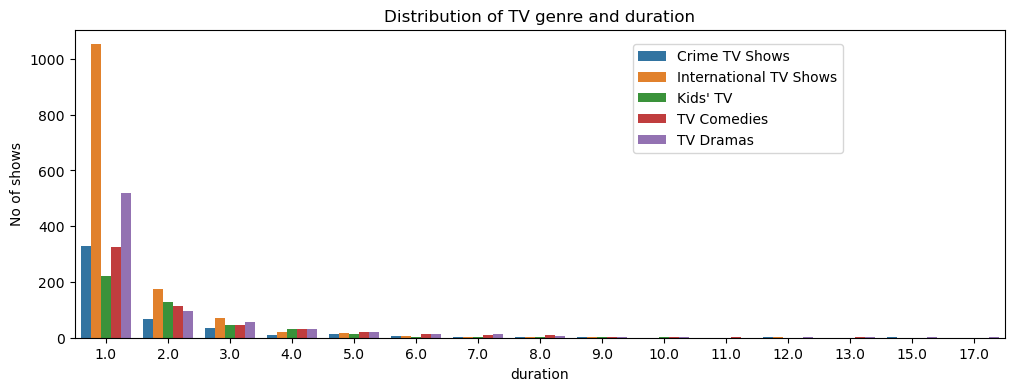

In [91]:
plt.figure(figsize=(12,4))
sns.barplot(data = duration_genre,x='duration',y='title',hue='listed_in')
plt.ylabel('No of shows')
plt.legend(loc=(0.6,0.6))
plt.title('Distribution of TV genre and duration')
plt.show()

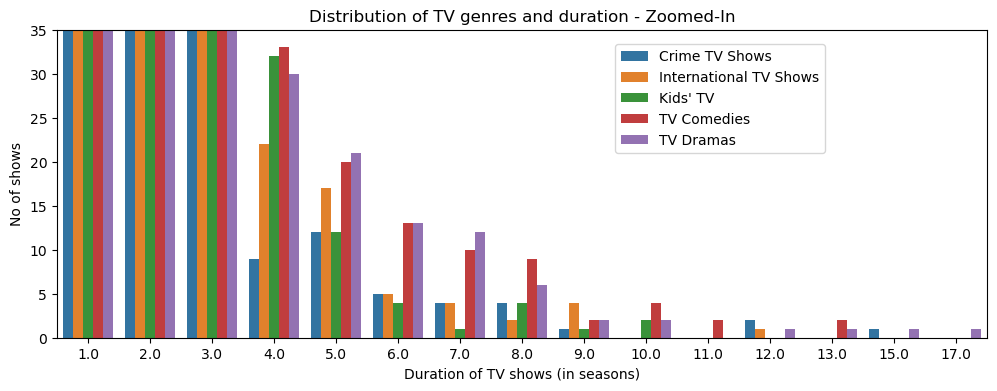

In [92]:

plt.figure(figsize=(12,4))
sns.barplot(data = duration_genre,x='duration',y='title',hue='listed_in')
plt.ylabel('No of shows')
plt.xlabel("Duration of TV shows (in seasons)")
plt.legend(loc=(0.6,0.6))
plt.ylim(0,35)
plt.title("Distribution of TV genres and duration - Zoomed-In")
plt.show()

We are assuming that the TV series which have more seasons released are more popular compared to tv shoes with 1 or 2 sesons. 

### Insights:
1. We can see that the comedy, drama and Internation TV genres are the most popular and sustain for longer time. 
2. If we internally compare between genres, the no of shows that came to sixth season are equal in number where as more no of comedy shows 8th, 10th and 13th seasons. 

In [93]:
duration_genre_movie = top5_movie_genre_df.groupby(['duration','listed_in'])['title'].nunique().reset_index()

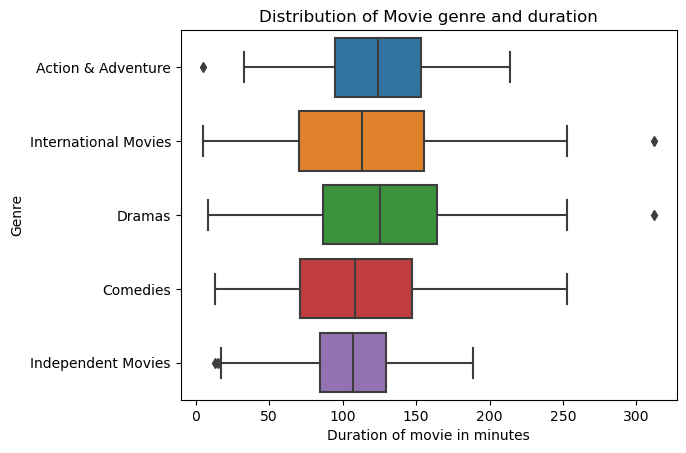

In [94]:
sns.boxplot(data=duration_genre_movie,x='duration',y = 'listed_in')
plt.xlabel('Duration of movie in minutes')
plt.ylabel('Genre')
plt.title("Distribution of Movie genre and duration")
plt.show()


Insight: 
1. most movies range between 75 mins to 175 mins and the median duration of different 
genres lies between 105 mins to 125 mins.


### >> Does Netflix has more focus on TV Shows than movies in recent years

In [96]:
type_trend = nflix.groupby(['release_year','type'])['title'].nunique().reset_index()

In [99]:
type_trend

,release_year,type,title
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


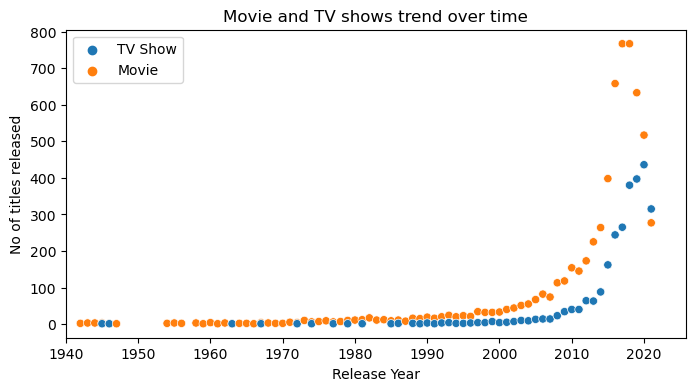

In [98]:

plt.figure(figsize=(8,4))
sns.scatterplot(data=type_trend,x='release_year',y='title',hue='type')
plt.ylabel("No of titles released")
plt.xlabel("Release Year")
plt.title('Movie and TV shows trend over time')
plt.legend(title=None)
plt.xlim(1940)
plt.show()

### Insigts:
1. adding Movies and TV shows to Netflix picked up pace after 2000 and grew exponentially after 2010. 
2. the rate of growth of movies slowed down after 2018 while tv content started to slow only after 2020.  
3. The data from 2019 and 2020 also suggests that the no of movies dropped significantly but more tv shows were lauched compared to its previous years. 

### Inference : 
1. Netflix not only adds existing content but also produces under the name of 'Netflix Originals'.These started in 2011, which may have marked the growth of content since then. We can infer from the graph that more movies than TV shows have been added thoughout except in the year 2021. 
2. Although we do not have the entire data of the year 2021, we could say that from Jan to Sept 2021, the no of TV shows added were greater than movies.
3. There was good amount of focus in launching TV shows.

### -> What is the best time to launch a TV show?

In [100]:
tv_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,TV Dramas,"After crossing paths at a party, a Cape Town t..."


In [101]:
tv_df['date_added'] = pd.to_datetime(tv_df['date_added'])

In [102]:
tv_df['month_added'] = tv_df['date_added'].dt.month
month_names = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_data = tv_df.groupby('month_added')['title'].nunique().reset_index()

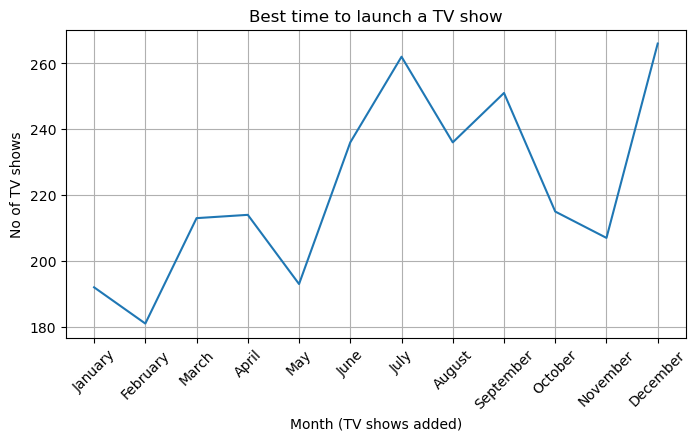

In [103]:
plt.figure(figsize=(8,4))
sns.lineplot(data=monthly_data,x='month_added',y='title')
plt.title('Best time to launch a TV show')
plt.grid()
plt.xlabel('Month (TV shows added)')
plt.ylabel('No of TV shows')
plt.xticks([i for i in range(1,13)],month_names,rotation=45)

plt.show()

### Insights: 

1. Most number of TV shows were added in July or December

### Inference: 

1. Although having viewership data of the TV shows that ran each month would give more evidence to suggest an inference, from the popularity in no of tv shows being added each months we can deduce that Dec and July are the best months to launch TV shows. 

###  >> What type of content is available in different countries?

#### genre vs country 
as there are a lot of values in each of these fields, it is not possible to check the contribution of all genres for each country. 
For simplicity we are going to pick the top 5 genres generated by the top countries 

In [104]:
top5_tv_genre_list = tv_df['listed_in'].value_counts().reset_index()['index'].head()
top5_tv_genre_df = tv_df.loc[tv_df['listed_in'].isin(top5_tv_genre_list)]
tv_genre_cntry = top5_tv_genre_df.groupby(['country','listed_in'])['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(20)


In [105]:
tv_genre_cntry.head()


,country,listed_in,title
235,United States,TV Comedies,258
236,United States,TV Dramas,232
234,United States,Kids' TV,214
190,South Korea,International TV Shows,152
112,Japan,International TV Shows,151


In [106]:
top5_movie_genre_list = movie_df['listed_in'].value_counts().reset_index()['index'].head()
top5_movie_genre_df = movie_df.loc[movie_df['listed_in'].isin(top5_movie_genre_list)]

genre_country_trnd = top5_movie_genre_df.groupby(['country','listed_in'])['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(20)



In [107]:
genre_country_trnd.head()


,country,listed_in,title
143,India,International Movies,864
368,United States,Dramas,835
367,United States,Comedies,680
141,India,Dramas,662
366,United States,Action & Adventure,404


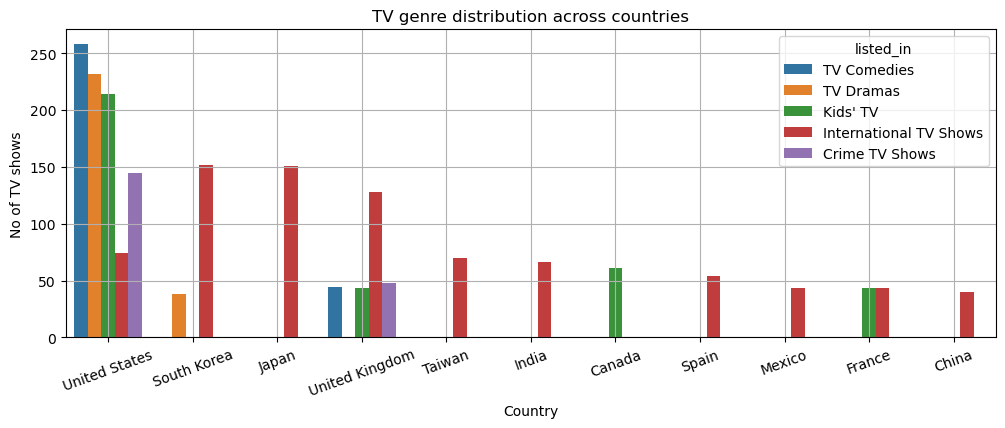

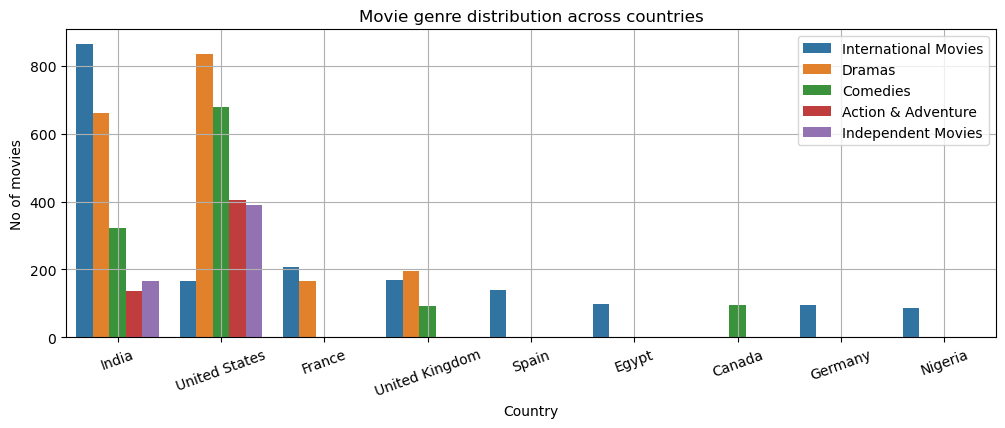

In [108]:
plt.figure(figsize=(12,4))
sns.barplot(data=tv_genre_cntry,x='country',y='title',hue='listed_in')
plt.xlabel('Country')
plt.ylabel("No of TV shows")
plt.title('TV genre distribution across countries')
plt.xticks(rotation=20)
plt.grid()


plt.figure(figsize=(12,4))
sns.barplot(data=genre_country_trnd,x='country',y='title',hue='listed_in')
plt.legend(loc='upper right')
plt.xlabel('Country')
plt.ylabel("No of movies")
plt.title('Movie genre distribution across countries')
plt.xticks(rotation=20)
plt.grid()

plt.show()

### Insights: 
1. If any foreign movie made in its local language is being classified as an International movie, there wont be any scope to compare genres with country to understand what type of content is available in dirrerent countries. 
2. We can see that in the top 4 countries, Dramas takes the lead with no of movies released, followed by comedy.

### Inference: 
1. Comedy is popular with India, US and UK whereas Drama is the type of content that popular with the the top 4 countries.

### >> Analysis of actors/directors of different types of shows/movies.

In [109]:
top15_tvcast = tv_df.groupby(['cast'])['title'].nunique().sort_values(ascending=False).reset_index().head(15)

In [110]:
top20_cast = movie_df.groupby(['cast'])['title'].nunique().sort_values(ascending=False).reset_index().head(20)

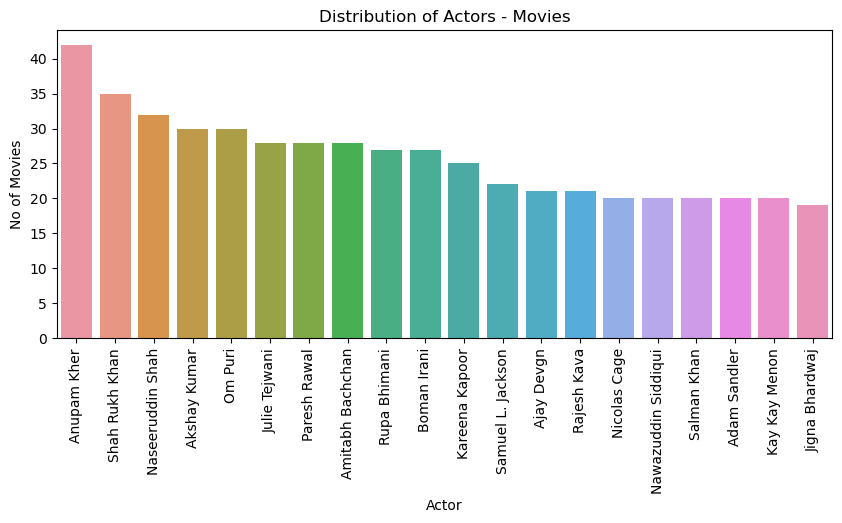

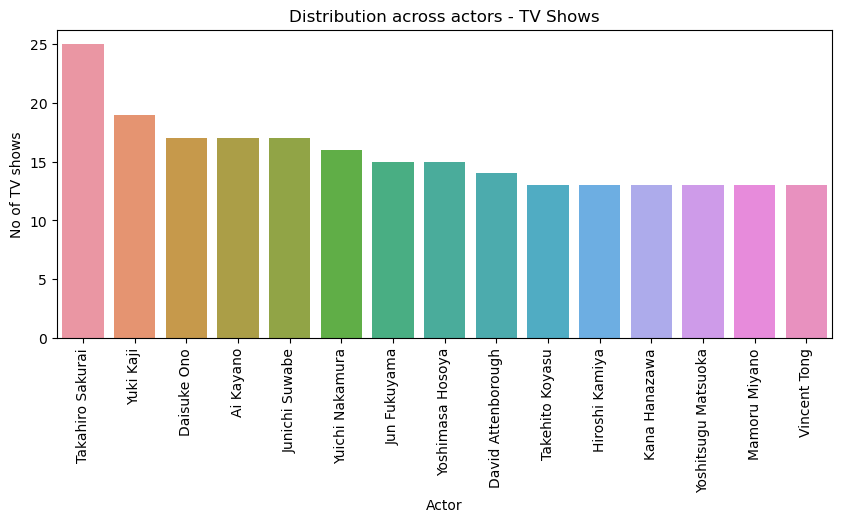

In [111]:
plt.figure(figsize=(10,4))
sns.barplot(data=top20_cast,x='cast',y='title')
plt.xticks(rotation=90)
plt.xlabel("Actor")
plt.ylabel("No of Movies")
plt.title("Distribution of Actors - Movies")


plt.figure(figsize=(10,4))
sns.barplot(data=top15_tvcast,x='cast',y='title')
plt.xticks(rotation=90)
plt.xlabel("Actor")
plt.ylabel("No of TV shows")
plt.title("Distribution across actors - TV Shows")

plt.show()

Insights: 
1. For movies, these are the top actors: Anupam Kher, Shah Rukh Khan, Naseeruddin Shah, Akshay Kumar, Om Puri, Julie Tejwani, Paresh Rawal, Amitabh Bachchan, Rupa Bhimani, Boman Irani,Kareena Kapoor.
2. For TV shows, the top actors are: Takahiro Sakurai, Yuki Kaji, Daisuke Ono, Ai Kayano, Junichi Suwabe,Yuichi Nakamura, Jun Fukuyama, Yoshimasa Hosoya, David Attenborough, Takehito Koyasu, Hiroshi Kamiya
3. We can see that most movie actors belong to india and most tv show actors belong to Japan with the exception of David Attenborough. 


# Recommendations: 

1. Proper classification of international movies: Along with the generic title, it will enable us to perform accurate analysis if we classified international movies based on its content type/genre. In the present dataset, most foreign movies/TV shows are classified as International movies/TV shows which can help us accurately identify exactly how many movies/TV shows belong to each genre.

2. According to the given data, drama and comedy are the most popular genre with the top countries. While simultaneously creating content in comedy and drama genres, we should also focus on adding/producing content from genres with potential like crime TV, action and adventure movies, kids movies and TV shows and documentaries/docuSeries etc. 

3. Any TV show releases should be done in the months of July or December. 

4. There are not many TV shows in Indian content. India being a huge market for content consumption, we could tie-up with local actors to create netflix originals for not only India, for other countries like UK, Spain, Canada etc. 






















